# Machine Learning - Homework 2

In [ ]:
import numpy as np #number python, matematiksel hesaplama kütüphanesi
import numpy.linalg as LA #linalg, linear algebra işlemleri yapmak için numpy'nin alt modülüdür.
import matplotlib.pyplot as plt # math plot library, grafik çizimi kütüpanesidir.

import random
from sklearn.model_selection import train_test_split #alt modüldür. Bu verileri train ve validation için ayrımayı sağlar.

#bu kod grafiklerin direk doğrudan notebook sayfasında görünmesini sağlayan sihirli bir komut.
%matplotlib inline

In [ ]:
# set the seeds for reproducibility
random.seed(412) #bu random seed yapmak önemli çünkü bizim oluştuduğumuz rastgale sayı disizinin aynısına sahip olmak istersek random.seed yapmalıyız.
np.random.seed(412) #ayrıca içeriye yazdığımız 412 sayısının herhangi bir anlamı yok herhangi bir sayı yazabilirdik fakat random serimizin aynı olmasını istiyorsak hep 412 sayısını kullanmalıyız.

# Generate Data for Regression

In [ ]:
def mapping(x, slope, bias): # x datalarımzdan y datalarımızı oluşturan bir fonksiyon.
  y = slope * x + bias  # Yani aslında y= ax + b denklemi
  return y


def generate_data(f, N, x_min, x_max):
  x_standard = np.random.rand(N, 1) # x values uniformly sampled from range [0, 1]
  x = x_standard * (x_max - x_min) + x_min   # carrying x values to the desired range [x_min, x_max]
  y = f(x) # compute y values from the underlying function f
  eps = 0.1 * np.random.randn(*y.shape)   # Gaussian noise with 0.1 standard deviation 
  return x, y + eps   # return x's and corrupted f(x) values 

In [ ]:
### PARAMETERS FOR THE DATA GENERATION ###
slope, bias = 2.5, 0.5    # slope (w1) and bias (w0) of the linear component
x_min, x_max = 0.0, 1.0   # range of x values
N = 50                   # number of samples

# set the slope, bias parameters of the mapping() function; leave x
f = lambda x : mapping(x, slope=slope, bias=bias) #burası bir fonksion oluşturur. " lambda x : " ifadesini koyduğumuzda f(x) anlamına getirir fonksiyonu.

# generate N samples with function f, where the x is in range [x_min, x_max]
x, y = generate_data(f, N, x_min, x_max)
print('x.shape :', x.shape, ', y.shape :', y.shape)


x.shape : (50, 1) , y.shape : (50, 1)


### 50% Train 50% Validation Split

In [ ]:
# Partition the dataset into train and test datasets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

print('x_train.shape :', x_train.shape, ', x_val.shape :', x_val.shape)
print('y_train.shape :', y_train.shape, ', y_val.shape :', y_val.shape)

x_train.shape : (25, 1) , x_val.shape : (25, 1)
y_train.shape : (25, 1) , y_val.shape : (25, 1)


# Make a scatter plot of the data

In [ ]:
def plot_samples(train_data, val_data=None): # train_data adında bir argüman alır. İsteğe bağlı olarak val_data adında bir ikinci argüman da alabilir.
  fig, ax = plt.subplots(figsize=(7, 5), dpi=100)  #figsize=(8, 6) boyutu belirliyor
  
  x_train, y_train = train_data
  ax.scatter(x_train, y_train, label='train samples')
  if val_data:
    x_val, y_val = val_data
    ax.scatter(x_val, y_val, label='val samples')
  
  ax.set_xlim([-0.05, 1.05])  # need to change 
  ax.set_ylim([-0.05, 3.55])  # need to change 
  ax.set_xlabel('x', fontsize=12)
  ax.set_ylabel('f(x)', fontsize=12)
  ax.set_title('Simulated Data Graphs')
  ax.legend(loc='lower right')
  return fig, ax

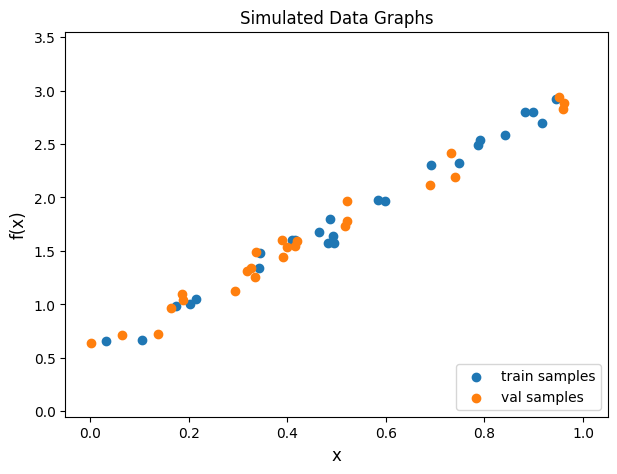

In [ ]:
# Plot train and test datasets
fig, ax = plot_samples(train_data=(x_train, y_train), val_data=(x_val, y_val))

In [ ]:
del x, y, x_train, y_train, x_val, y_val # I am deleting the variables so that you can start from scratch

#**Your job starts here!**

In this homework, we'll explore different regression techniques and their applications using sklearn and NumPy libraries. We'll start by considering **Dataset 1** (see the PDF document for this homework), which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), and use linear regression to model this relationship. 

First, let's generate Dataset 1:



In [ ]:
# use the generate_data function to get x, y. Do not change N, x_min, and x_max
x, y = generate_data(f, N, x_min, x_max)
# split the data to train and validation sets 50%-50% <-- after splitting, you can add a print statement to check the data shapes
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_train shape: (25, 1)
y_train shape: (25, 1)
x_val shape: (25, 1)
y_val shape: (25, 1)


# Part 1.a (10pts)

Our objective in Part 1.a is to use sklearn's linear regression model on Dataset 1. The main steps are as follows:  

1.   Initialize the model
2.   Fit it to the data
3.   Make predictions on the validation set

Then, we will evaluate the performance of the model on the validation set using the **mean squared error (MSE)** metric and print the result.

In [ ]:
# import the linear regression model from the sklearn.linear_model module.
from sklearn.linear_model import LinearRegression
# import the mean squared error function from sklearn.metrics
from sklearn.metrics import mean_squared_error

# initialize the linear regression model
reg_model = LinearRegression()

# fit the model to the data
reg_model.fit(x_train, y_train)

# find the model's predictions on the validation set
y_pred = reg_model.predict(x_val)

# evaluate the model's performance on the validation set using mean squared error (MSE)
mse_sklearn = mean_squared_error(y_val, y_pred)

# print the model's mean squared error using this--> print('MSE of sklearn model: ', mse_sklearn)
print('MSE of sklearn model: ', mse_sklearn)

#NOT-Tekrar:
#1-mse (ortalama kare hatası), bir modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçen bir hata ölçüsüdür. 
#2-Bu nedenle, ne kadar düşük olursa, modelin performansının o kadar iyi olduğu söylenebilir.
#3-Verdiğiniz örnekte, mse değeri oldukça düşük (0.00795462682779033). 
#4-Bu, modelin tahminlerinin gerçek değerlerle oldukça iyi eşleştiğini gösterir ve modelin performansının oldukça yüksek olduğunu gösterir.
#5-Ancak, her zaman yalnızca bu değer üzerinden bir yorum yapmak pek doğru olmaz. 
#5-MSE değerinin anlamlı olması için, modele ait diğer performans ölçütleri de değerlendirilmelidir. 
#6-Ayrıca, veri setinin boyutu, yapısı ve amacı gibi faktörler de hesaba katılmalıdır.

MSE of sklearn model:  0.00795462682779033


Next, we'll visualize the linear regression model's fit to Dataset 1 by drawing the **regression line** onto a scatter plot of the train and validation samples. To do this:

1.   Make a scatter plot of train and validation samples using the **plot_samples()** function.
2.   Draw the regression line onto this plot by following the directions in the comments.

By looking at the plot, we can get an idea of how well the linear regression model fits the data.

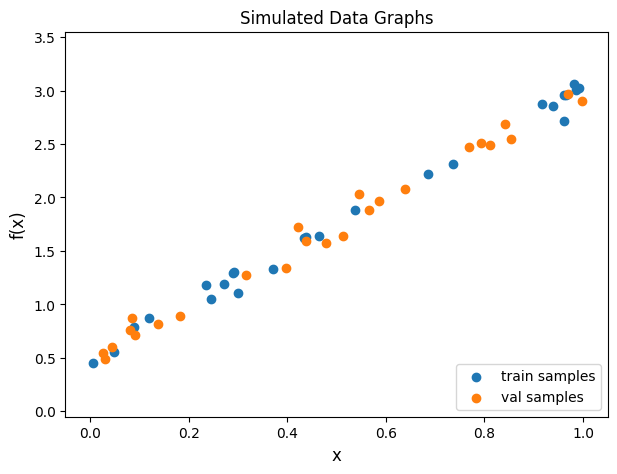

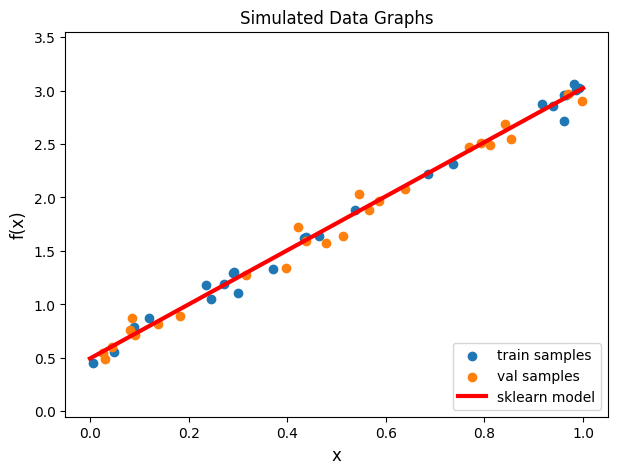

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples(train_data = (x_train, y_train), val_data = (x_val, y_val))

#-----------
# create a new figure and axis object
fig2, ax2 = plot_samples(train_data = (x_train, y_train), val_data = (x_val, y_val))
#-----------

x_grid = np.linspace(x_min, x_max, 100) # do not change anything in this line

# now use the model's predict() function on x_grid to find y_grid
y_grid = reg_model.predict(x_grid.reshape(-1, 1))

ax2.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model')
ax2.legend(loc = 'lower right') # burada "lower right" yazılmış fakat galiba başına "loc =" ifadesi yazmayı unutmuşlar.
#display(fig)

Great! Now you know how to find the regression coefficients using the sklearn's linear regression model, and how to plot the regression line. Let's proceed to **Part 1.b**

# Part 1.b (10pts)

In this part, we will use the pseudo-inverse solution manually to find the optimal regression coefficients. The main steps are as follows:

1.   Constructing the extended data matrix **X** that includes a column of ones for the bias (intercept) term. 
2.   Taking the pseudo-inverse (pinv) of **X**.
3.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**. 

*(Note that pinv(**X**) is a 2 x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions 2 x 1)*

In [ ]:
from numpy.linalg import pinv
''' In the next two lines, construct the extended data matrices for training and validation,
by adding a column of ones to the original data matrix. For this, you can use np.concatenate() 
function with the option axis=1. See the function documentation for further information''' 
# 1. construct the extended data matrix for train 
X_extended_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
# 2. construct the extended data matrix for val
X_extended_val = np.concatenate((np.ones((x_val.shape[0], 1)), x_val), axis=1)

#-----------------------
# print the shapes of the extended data matrices, just to check
print('Extended data matrix for train shape: ', X_extended_train.shape)
print('Extended data matrix for val shape: ', X_extended_val.shape)
#-----------------------

# 3.1. find the pseudoinverse (pinv) of the extended data matrix (PSEUDOINVERSE = kare olmayan matrix'in tersi almak. / not: math201 dersinde kare matrix'lerin tersi alınmazdı)
X_extended_train_pinv = pinv( X_extended_train )
# 3.2. perform the matrix multiplication pinv(X_extended) * y to find regression coefficients (w) ## look up np.matmul() function
w = np.matmul( X_extended_train_pinv, y_train ) #matmul açılımı matrix multiplication demek. Adı üstünde 2 matrix'in çarpımını yapan python fonksiyonu.

#-----------------------
# print the shapes of the extended data matrices, just to check
print('X_extended_train_pinv.shape: ', X_extended_train_pinv.shape, '\n')
print('w: ', w.shape, '\n')
#-----------------------

# find the models prediction on validation set (FOR VALIDATION SET)
"""X_extended_val matrisi, doğrusal regresyon modelinin kullanacağı özellik matrisini içerirken, 
w matrisi doğrusal regresyon modelinin tahmin edeceği katsayılar matrisini temsil eder. 
Bu iki matris çarpıldığında, doğrusal regresyon modelinin tahmin edilen çıktılarını içeren bir vektör oluşturulur."""
y_pred = np.matmul(X_extended_val, w)

# evaluate the model's performance on the validation set using mean squared error (MSE)
mse = np.mean((y_val - y_pred)**2)

# print the model's mean squared error using this --> print('MSE of manual model: ', mse)
print('MSE of manual model: ', mse)

Extended data matrix for train shape:  (25, 2)
Extended data matrix for val shape:  (25, 2)
X_extended_train_pinv.shape:  (2, 25) 

w:  (2, 1) 

MSE of manual model:  0.007954626827790374


Now that you have implemented your own linear regression algorithm and found the regression coefficients, let's visualize the results.

We will follow similar steps as in **Part 1.a** to draw the regression line found by your implementation onto the scatter plot of Dataset 1. Please follow the directives in the comments for details.

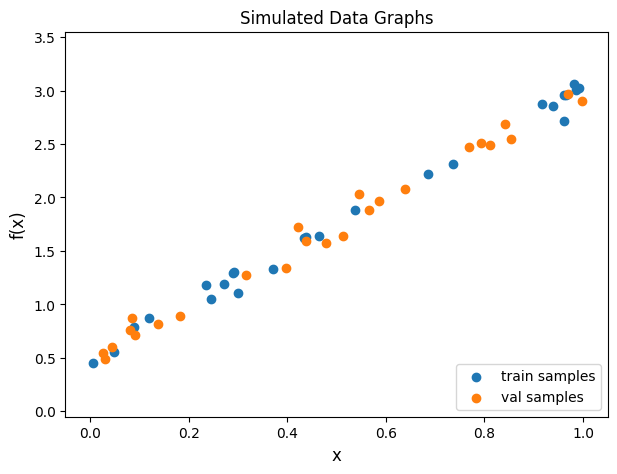

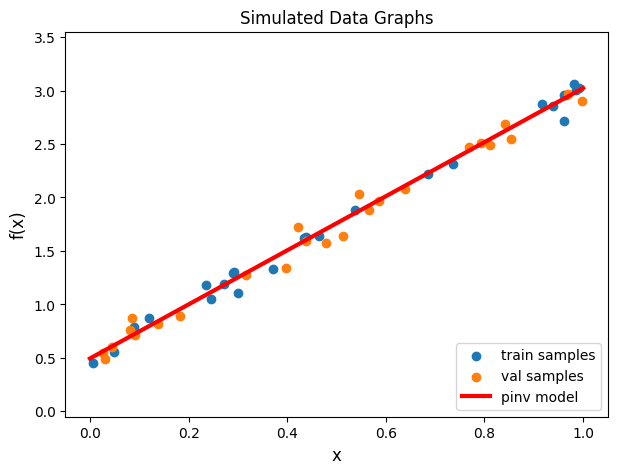

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val)) # uncomment this line after filling in the parantheses, just like we did above

#--------------------------
fig2, ax2 = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val))
#--------------------------

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line

#--------------------------
#print('x_grid: ', x_grid, '\n')
#--------------------------

# first, construct the extended version of x_grid, just like you did to train and validation data matrices
X_grid_extended = np.concatenate((np.ones((x_grid.shape[0], 1)), x_grid), axis=1)

#--------------------------
#print('X_grid_extended: ', X_grid_extended, '\n')
#--------------------------

# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid_pred = np.matmul(X_grid_extended, w)

#y_grid değişkenini kullanarak, önceki adımda hesapladığımız regresyon çizgisini saçılım grafiğimize ekleyebiliriz:
ax2.plot(x_grid, y_grid_pred, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid

ax2.legend(loc = 'lower right') # uncomment this line too

#display(fig) # uncomment this line too

Now you also know how to find the regression coefficients manually using the pseudoinverse method. In the last piece of **Part 1**, we're going to find the regression via gradient descent (GD) method. Let's proceed:

# Part 1.c (25pts)

In this part, we're going to implement gradient descent optimization algorithm to find regression coefficients in an iterative manner. Starting with initial regression coefficients, we're going to take small steps in directions which minimizes the mean squared error. The main steps of the algorithm are as follows:


0.   Make sure that your extended data matrices (computed in **Part 1.b**) have dimensions of (N x 2), where N is variable. We don't care about what N is, but the second dimension must be two!
1.   Initialize the regression coefficients (i.e., weights **w**) with some values, usually random or zero.
2.   Choose a step size (i.e., learning rate **lr**) which determines the size of the steps we take in the direction of minimizing the cost function (**MSE**).
3.   Repeat the following steps for **M** steps:

     1.   Compute the predicted values using the current regression coefficients and input data:
        **y_pred** = **X** * **w**
        
        *Note that **X** * **w** is matrix multiplication of **X** and **w**.*
     2.   Compute the difference between predicted and actual values (i.e., the error):
        **pred_error** = **e** = (**y_pred** - **y**) 
     3.   Compute the gradient of the cost function with respect to the regression coefficients: 
        **w_grad** = (transpose(**X**) * **e**) / **N**

        *Note that transpose(**X**) * **e** is matrix multiplication of transpose(**X**) and **e**, and **N** is the number of samples.*
     4.   Update the regression coefficients by subtracting the gradient times the learning rate from the current coefficients. 
     
        (**w** = **w** - **w_grad** * **lr**)
     5.   Calculate the new value of the cost function (**MSE**) using the updated regression coefficients **w** and input data **X**.

4.   Return the final regression coefficients.

**Additional Info**

**X** is an N x 2 matrix. **y** is an N x 1 column vector. **w** is a 2 x 1 column vector. As a result of the matrix multiplication, **y_pred** = **X** * **w** should also have dimensions of N x 1, same with **y** !

transpose(**X**) has dimensions of 2 x N. Similarly, the matrix multiplication transpose(**X**) * **e** yields **w_grad** with dimensions 2 x 1, same with **w** !

These values are here for you to check yourself while writing your code. While developing your code, use the **shape** property of your numpy arrays sparingly!

In [ ]:
#1-Make sure that your extended data matrices (computed in Part 1.b) have dimensions of (N x 2), where N is variable. +
print('Extended data matrix for train shape: ', X_extended_train.shape)
print('Extended data matrix for val shape: ', X_extended_val.shape, '\n')

#2-
M = 1000 # number of iterations (iterations = yineleme - tekrar demek.)
lr = 0.1 # learning_rate, you don't have to play with this value.

#3- initialize your regression coefficients using np.zeros() or np.random.randn() (what are the dimensions of w ?)
w = np.zeros((2, 1))

for i in range(M):
  '''Follow the steps given above'''
  # 1.Compute predicted values using current regression coefficients and input data
  y_pred_train = np.dot(X_extended_train, w)
  y_pred_val = np.dot(X_extended_val, w)

  # 2.Compute difference between predicted and actual values (i.e., the error)
  error_train = y_pred_train - y_train
  error_val = y_pred_val - y_val

  # 3.Compute the gradient of the cost function with respect to the regression coefficients
  w_grad_train = (np.transpose(X_extended_train) @ error_train) / X_extended_train.shape[0]
  w_grad_val = (np.transpose(X_extended_val) @ error_val) / X_extended_val.shape[0]
    
  # 4.Update the regression coefficients
  w = w - lr * w_grad_train

  # 5.Calculate the new value of the cost function (MSE) using the updated regression coefficients and input data
  MSE_train = np.mean((np.dot(X_extended_train, w) - y_train) ** 2)
  MSE_val = np.mean((np.dot(X_extended_val, w) - y_val) ** 2)

  if (i == 0) or ((i+1) % 100 == 0):
   print('MSE error at step {}: Train: {:.4f}, Val: {:.4f}'.format(i+1, MSE_train, MSE_val))
 
print('\nIn the last step, Best MSE for x_train: ', MSE_train ) 

Extended data matrix for train shape:  (25, 2)
Extended data matrix for val shape:  (25, 2) 

MSE error at step 1: Train: 3.1845, Val: 2.5459
MSE error at step 100: Train: 0.0615, Val: 0.0586
MSE error at step 200: Train: 0.0148, Val: 0.0161
MSE error at step 300: Train: 0.0069, Val: 0.0092
MSE error at step 400: Train: 0.0056, Val: 0.0081
MSE error at step 500: Train: 0.0053, Val: 0.0079
MSE error at step 600: Train: 0.0053, Val: 0.0079
MSE error at step 700: Train: 0.0053, Val: 0.0079
MSE error at step 800: Train: 0.0053, Val: 0.0080
MSE error at step 900: Train: 0.0053, Val: 0.0080
MSE error at step 1000: Train: 0.0053, Val: 0.0080

In the last step, Best MSE for x_train:  0.005275155082594279


Now, we'll draw the regression line found by your implementation onto the scatter plot of Dataset 1. For that, we're going to:

1.   Make a scatter plot of train and validation samples using plot_samples() function.
2.   Draw the regression line onto this plot by following the directions in the comments.

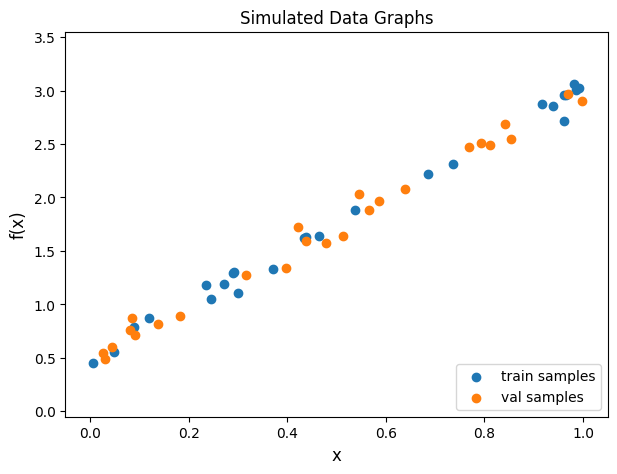

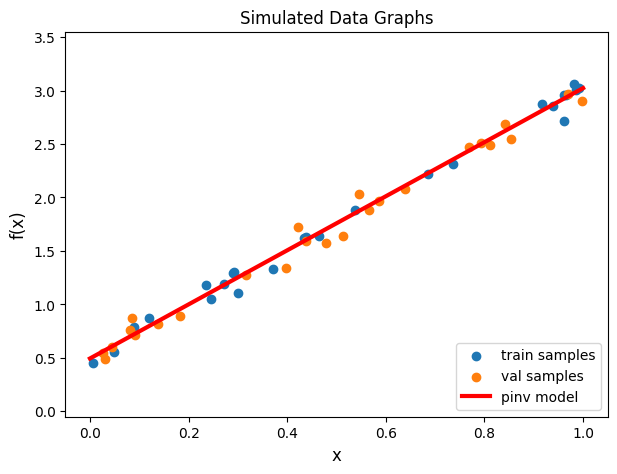

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val) )

#----------------
fig2, ax2 = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val) )
#----------------

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line

# first, construct the extended version of x_grid, just like you did to train and validation data matrices
X_grid_extended = np.concatenate((np.ones((x_grid.shape[0], 1)), x_grid), axis=1)

# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_grid = X_grid_extended.dot(w)

ax2.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid
ax2.legend(loc = 'lower right') # uncomment this line too
# display(fig) # uncomment this line too

# Part 2 - Data Generation

In Part 2 of the homework, we are moving from **Dataset 1** which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), to **Dataset 2** which has a **non-linear** relationship between **x** and **y**, requiring the use of non-linear regression techniques to model the relationship, such as polynomial regression.

In this part, we are going to load the data from an **.npy** file, which is a file format used to store numerical data in Python, optimized for use with the NumPy library.

In [ ]:
x = np.load('dataset2_data.npy')
y = np.load('dataset2_labels.npy')

# Write code to split the data to train and validation sets 50%-50% <-- after splitting, you can add a print statement to check the data shapes
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)
print('x_train: ', x_train.shape)
print('x_val: ', x_val.shape)
print('y_train: ', y_train.shape)
print('y_val: ', y_val.shape)

x_train:  (25, 1)
x_val:  (25, 1)
y_train:  (25, 1)
y_val:  (25, 1)



# Part 2.a (20pts)

Our objective in Part 2.a is to use the sklearn library for performing linear regression on **polynomial features**. To do this,

1.   We'll use **PolynomialFeatures** from the **sklearn.preprocessing** module to expand our input data matrix **X** with polynomial features. 
2.   Then, we'll use **LinearRegression** from **sklearn.linear_model** to fit the model to X.
3.   Make predictions on the validation set. 

We'll evaluate the model's performance on the validation set using the **mean squared error (MSE)** metric and print the result.

Try polynomial degrees of 1, 3, 5, and 7 and comment on the best model in your report.

*-Please check the documentation of PolynomialFeatures before starting this part.*

In [ ]:
# import the polynomial features object from sklearn.preprocessing module
from sklearn.preprocessing import PolynomialFeatures

# order = ... # <-- specify the order of the polynomial features
order = [1, 3, 5, 7]

mse_values = []

for k in order:
  # construct polynomial features of degree "order" using PolynomialFeatures()
  '''include_bias=False parametresini kullanarak, PolynomialFeatures() 
  fonksiyonunun ek sabit terim özelliğini oluşturmasını engelliyoruz.'''
  poly_features = PolynomialFeatures(degree=k, include_bias=False) #Not: şu =false neden false bunu bir hocaya sor.

  # fit the polynomial features to training data using fit_transform() function of your PolynomialFeatures object
  x_poly_train = poly_features.fit_transform(x_train)

  # transform the validation data using transform() function of your PolynomialFeatures object
  x_poly_val = poly_features.transform(x_val)

  # initialize linear regression model
  lin_reg = LinearRegression()

  # fit the model to the polynomial features of training data
  lin_reg.fit(x_poly_train, y_train)

  # make predictions on validation set 
  y_pred = lin_reg.predict(x_poly_val)

  # evaluate the model's performance on the validation set using mean squared error (MSE)
  mse_sklearn_polynomial = mean_squared_error(y_val, y_pred)

  mse_values.append(mse_sklearn_polynomial)

  # print the model's mean squared error using this--> print('MSE of sklearn model: ', mse_sklearn_polynomial)
  print('MSE of sklearn model for k=', k, ' : ', mse_sklearn_polynomial)

best_model_index = mse_values.index(min(mse_values))
print('---------------------------------------------------')
print(f"Best Model k= {order[best_model_index]} and MSE: {min(mse_values) } " )


MSE of sklearn model for k= 1  :  0.06362852709262727
MSE of sklearn model for k= 3  :  0.01205922374286809
MSE of sklearn model for k= 5  :  0.007475463079281072
MSE of sklearn model for k= 7  :  0.011549227838818095
---------------------------------------------------
Best Model k= 5 and MSE: 0.007475463079281072 


Now we're moving on to the plot. This part is similar to the previous ones, but be careful to pick up small differences.

By looking at the plot, we can get an idea of how well the polynomial regression model fits the data.

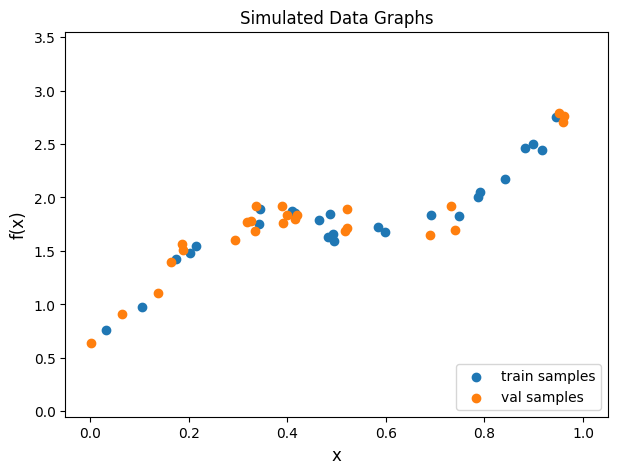

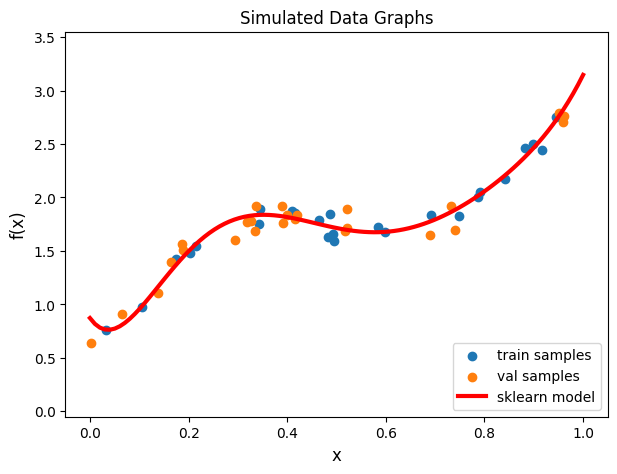

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val) ) # uncomment this line after filling in the parantheses, just like we did above

#----------------------------------------
fig2, ax2 = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val) ) # uncomment this line after filling in the parantheses, just like we did above
#----------------------------------------

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line

# transform the x_grid the same way you transformed the validation data
x_poly_grid = poly_features.transform(x_grid)

# now use the linear regression model's predict() function on transformed x_grid to find y_grid
y_grid = lin_reg.predict(x_poly_grid)

ax2.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
ax2.legend( loc = 'lower right') # uncomment this line too
#display(fig) # uncomment this line too

# Part 2.b (15)

In this part, we will implement our own polynomial regression algorithm to find the optimal regression coefficients. The main steps are as follows:

1.   Choose the degree of the polynomial regression as **3**. Above, you were asked to vary this and choose the best model (best polynomial degree) according to validation set; however in this part the aim is just to learn the implementation. 
2.   Constructing the data matrix **X** that includes a column of ones for the bias (intercept) term.
3.   Taking the pseudo-inverse (pinv) of **X**.
4.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**. 

*(Note that pinv(**X**) is a (degree+1) x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions (degree+1) x 1)*

.

.

.

**Illustration for Step 2 of algorithm (for degree 3)** 

From $\quad x = \begin{bmatrix}
x_1 \\ x_2\\ \vdots \\ x_N \\
\end{bmatrix}$, we want to obtain $\quad X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & x_N^3 \\
\end{bmatrix}$.


where N is the number of samples (in either train or val dataset), and each column holds a power of **x**, starting from 0-th power in the first column, till the **degree** you specified.

In [ ]:
from numpy.linalg import pinv
''' In the next two lines, construct the data matrices containing polynomial features for training and validation,
by adding columns of powers of the original data vector. For this, you can use np.concatenate() 
function with the option axis=1. See the function documentation for further information''' 

# 1. construct the data matrix for train 
X_train = np.concatenate([np.ones((len(x_train), 1)), x_train ** 3, x_train ** 2, x_train], axis=1)

# 2. construct the data matrix for val
X_val = np.concatenate([np.ones((len(x_val), 1)), x_val ** 3, x_val ** 2, x_val], axis=1)

# print the shapes of the data matrices, just to check
print("Shape of X_train: ", X_train.shape)
print("Shape of X_val: ", X_val.shape)

# 3.1. find the pseudoinverse (pinv) of the data matrix
X_train_pinv = pinv(X_train)

# 3.2. perform the matrix multiplication pinv(X) * y to find regression coefficients (w) ## look up np.matmul() function
w = np.matmul(X_train_pinv, y_train)

# find the models prediction on validation set 
y_pred_val = np.matmul(X_val, w)

# evaluate the model's performance on the validation set using mean squared error (MSE)
mse_sklearn = mean_squared_error(y_val, y_pred_val)

# print the model's mean squared error using this --> print('MSE of sklearn model: ', mse_sklearn)
print('MSE of sklearn model: ', mse_sklearn)

Shape of X_train:  (25, 4)
Shape of X_val:  (25, 4)
MSE of sklearn model:  0.012059223742868233


Make a plot

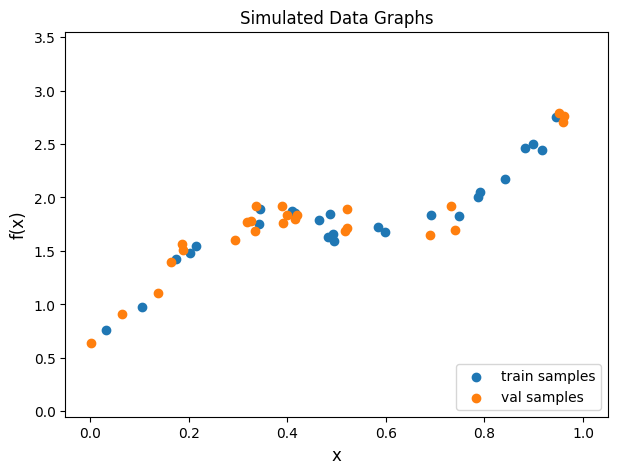

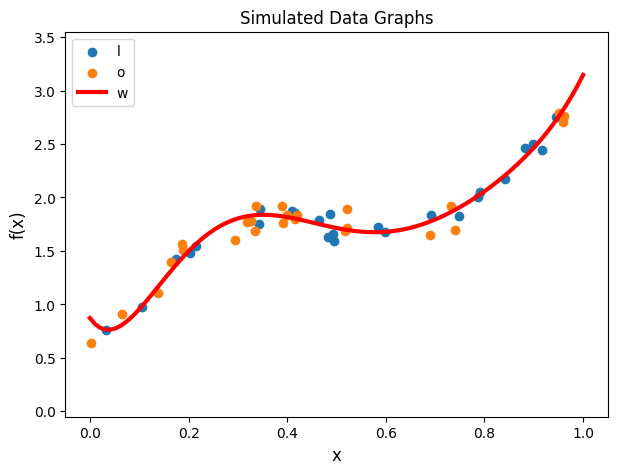

In [ ]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
fig, ax = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val) ) # uncomment this line after filling in the parantheses, just like we did above

#-------------------------------------------
fig2, ax2 = plot_samples( train_data = (x_train, y_train), val_data = (x_val, y_val) )
#-------------------------------------------

x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line

#print(x_grid.shape)

# transform the x_grid the same way you transformed the train and val vectors.
x_poly_grid = np.concatenate([np.ones((len(x_grid), 1)), x_grid ** 3, x_grid ** 2, x_grid], axis=1)

#print(x_poly_grid.shape)
#print(w.shape)

# now, using the regression coefficients, find the model's predictions (y_grid = Xw)
y_poly_grid = np.matmul(x_poly_grid, w)

ax2.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
ax2.legend('lower right') # uncomment this line too
#display(fig) # uncomment this line too

# Report (20pts)

*   Prepare a PDF report with the following and **include a link to your Colab Notebook at the top. making sure the link public** (-20pts if missing or not public)!

*   Your report should contain sections in the same order as you're seeing in this notebook and labeled as **Part 1.a Results** etc). **In each part, you should include the regression coefficients you have found in that part and all the plots and MSE errors.**

*   In Part 1, you should comment on whether the gradient descent solution is the same (or very close) to solutions obtained for Part1.a and b. If not, add a line of explanation as to why you think it is not.

*   In Part 2, comment on the effect of the **degree** parameter. What happens when it is chosen too small or too big? What do you think is the optimal **degree** value, and why? Discuss from the perspective of **underfitting**/**overfitting**.

ı just copied and pasted here from my real pdf report document. Please read my pdf report. Here is just for showing.


Name: Tan Ufuk Çel/k, ID: 28285, Course: CS412 # Report
---------------------------------------------------------------------------------------------------------------- 1-) Prepare a PDF report with the following and **include a link to your Colab Notebook at the top. making sure the link public** (-20pts if missing or not public)! ----------------------------------------------------------------------------------------------------------------
https://colab.research.google.com/drive/1Qw_ToIuXtzXolJJwD9FZ9RIPqEPqyX4z?usp=sharing
---------------------------------------------------------------------------------------------------------------- 2-) Your report should contain sections in the same order as you're seeing in this notebook and labeled as **Part 1.a Results** etc). **In each part, you should include the regression coefficients you have found in that part and all the plots and MSE errors.** ----------------------------------------------------------------------------------------------------------------
1.a Results: Here we s/mply tra/n our model, make pred/ct/ons, and then use the MSE method to determ/ne how accurate th/s pred/ct/on /s.
MSE: 0.00795462682779033
MSE /s a measure of error that measures how far a model's pred/ct/ons are from the true values. Therefore, /t can be sa/d that the lower /t /s, the better the performance of the model.
For example, the MSE value here /s qu/te low (0.00795462682779033).
Th/s shows that the pred/ct/ons of the model match the real values qu/te well and /nd/cates that the performance of the model /s qu/te h/gh.
However, /t may not always be r/ght to make a comment only on th/s value.
For the MSE value to be mean/ngful, other performance measures of the model must also be evaluated. In add/t/on, factors such as the s/ze, structure and purpose of the data set should be taken /nto account.
When we graph the data we have created here, we observe that the data /n the (x,y) state /s /ncreas/ng gradually and the /ncrease /s l/nearly /ncreas/ng proport/onally and regularly. Th/s g/ves us the mean/ng that we can pred/ct that th/s graph w/ll ex/st /n a l/near way /n the future before we see the future data. In th/s way, we pred/ct future data us/ng the l/near regress/on method.
   
-------------------------------------------------
1-b Results:
In fact, we f3nd the same th3ng 3n all parts of task 1 us3ng d3fferent methods. Now we w3ll use a manual pseudo 3nverse solut3on.
MSE of manual model: 0.06362852709262726
I don't put the graphs aga3n because we got the same graph as 1.a.
Note to myself about part 1.b: The x_extended_val matr3x conta3ns the feature matr3x that the l3near regress3on model w3ll use, wh3le the w matr3x represents the coeff3c3ents matr3x that the l3near regress3on model w3ll pred3ct.
When these two matr3ces are mult3pl3ed, a vector conta3n3ng the pred3cted outputs of the l3near regress3on model 3s created. -------------------------------------------------
1.c Results:
In th3s part, we use the grad3ent descent algor3thm.
Thanks to the algor3thm we use 3n every step of th3s algor3thm, the value of MSE decreases numer3cally, wh3ch means that our marg3n of error 3mproves.
I do not put the graph3cs here because the same graph3c 3s formed as a graph3c.
SE error at step 1: Tra3n: 3.1845, Val: 2.5459
MSE error at step 100: Tra3n: 0.0615, Val: 0.0586 MSE error at step 200: Tra3n: 0.0148, Val: 0.0161 MSE error at step 300: Tra3n: 0.0069, Val: 0.0092 MSE error at step 400: Tra3n: 0.0056, Val: 0.0081 MSE error at step 500: Tra3n: 0.0053, Val: 0.0079 MSE error at step 600: Tra3n: 0.0053, Val: 0.0079 MSE error at step 700: Tra3n: 0.0053, Val: 0.0079 MSE error at step 800: Tra3n: 0.0053, Val: 0.0080 MSE error at step 900: Tra3n: 0.0053, Val: 0.0080 MSE error at step 1000: Tra3n: 0.0053, Val: 0.0080
In the last step, Best MSE for x_tra3n: 0.005275155082594279

-------------------------------------------------
2.a Results:
In th/s part, we created our f/rst nonl/near data. When we shape them, these are the outputs:
x_tra/n: (25, 1) x_val: (25, 1) y_tra/n: (25, 1) y_val: (25, 1)
Us/ng the ''/nclude_b/as=False parameter, Polynom/alFeatures()
We are prevent/ng the funct/on from generat/ng the add/t/onal constant term property.
#Not: şu “/nclude_b/as=false” neden false bunu b/r TA hocaya sor.
Here, however, /f our data does not progress l/nearly, we can use the polynom/al regress/on est/mat/on method /f /t proceeds /n a polynom/al way /nstead. (I thought th/s graph m/ght be useful for s/mple dollar/tl graphs.) As an extra here, the degrees of the polynom/al are /mportant because /t g/ves an /dea about the curvature of the polynom/al. Th/s k value, that /s, /ts degree, /s /mportant /n order to f/t our data better. We've been g/ven rat/ngs of 1,3, 5, 7 to try here.
Here /s the result as follows:
MSE of sklearn model for k= 1 : 0.06362852709262727 MSE of sklearn model for k= 3 : 0.01205922374286809 MSE of sklearn model for k= 5 : 0.007475463079281072 MSE of sklearn model for k= 7 : 0.011549227838818095
Best Model k= 5 and MSE: 0.007475463079281072 The result from our graphs /s as follows:
------ ------ ------
  
-------------------------------
2.b Results:
# 1. construct the data matr/x for tra/n
X_tra/n = np.concatenate([np.ones((len(x_tra/n), 1)), x_tra/n ** 3, x_tra/n ** 2, x_tra/n], ax/s=1)
# 2. construct the data matr/x for val
X_val = np.concatenate([np.ones((len(x_val), 1)), x_val ** 3, x_val ** 2, x_val], ax/s=1)
Here, after convert/ng our data to a more su/table matr/x, we take the pseudo/nverse and f/nd the w value. Then we calculate our MSE value.
MSE of sklearn model: 0.012059223742868233 And then we f/nd the same graph as the graph /n 2.a.
General:
In th/s ass/gnment, we generally tr/ed l/near regress/on and polynom/al regress/on est/mat/on methods and d/fferent methods to reach the/r MSE values. In th/s way, we saw how the forecast was progress/ng by see/ng the d/fferent methods and v/sual/z/ng the data and the red l/ne for the forecast.
---------------------------------------------------------------------------------------------------------------- * In Part 1, you should comment on whether the grad7ent descent solut7on 7s the same (or very close) to solut7ons obta7ned for Part1.a and b. If not, add a l7ne of explanat7on as to why you th7nk 7t 7s not.
----------------------------------------------------------------------------------------------------------------
The d&fference between the results of these methods may depend on many factors, such as the s&ze of the dataset, the complex&ty of the l&near regress&on model, and the parameters used. However, both methods tra&n the l&near regress&on model and both evaluate the&r performance us&ng an error measure, the mean square error (MSE). The grad&ent descent method &s a common method used &n solv&ng l&near regress&on problems, but &f the correct hyperparameters are not selected or a model that &s compat&ble w&th the dataset structure, th&s method may not g&ve accurate results l&ke the method presented &n Chapter 1.
----------------------------------------------------------------------------------------------------------------
* In Part 2, comment on the effect of the **degree** parameter. What happens when &t &s chosen too small or too b&g? What do you th&nk &s the opt&mal **degree** value, and why? D&scuss from the perspect&ve of **underf&tt&ng**/**overf&tt&ng**. ----------------------------------------------------------------------------------------------------------------
I ment&oned th&s part l&ghtly above, but I'm talk&ng &n more deta&l:
If the degree parameter &s chosen too small, a s&tuat&on may ar&se where the model w&ll be &nsuff&c&ent, that &s, underf&tt&ng may occur. In th&s case, the model may not be able to make accurate pred&ct&ons because &t &s not adequately su&ted to the complex&ty of the data. On the other hand, &f the degree parameter &s chosen too large, a s&tuat&on may ar&se where the model w&ll be too complex and may exper&ence overf&tt&ng. In th&s case, the model w&ll be very sens&t&ve to the no&se or var&ance of the data. Th&s means that the model w&ll not perform well on real-l&fe data. Therefore, the opt&mal degree parameter may vary depend&ng on the data set. The most appropr&ate grade should be chosen accord&ng to the complex&ty of the data. If the complex&ty of the data &s low, the rat&ng can be kept low. But as the complex&ty of the data &ncreases, the degree can be &ncreased. In general, the grade select&on should be done correctly so that the model does not exper&ence overf&tt&ng.
